# Mushroom Classification — Edible vs Poisonous
**Name:** Aanchal Gupta  
**Date:** 11 November 2025 

**Introduction:**  
This project uses the UCI Mushroom dataset to predict whether a mushroom is edible or poisonous based on its physical features. The goal is to explore the data, handle missing values, and prepare it for machine learning models.



## Imports


In [2]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------------------------------------- - 8.7/8.9 MB 53.8 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 42.5 MB/s eta 0:00:00


In [5]:
# Cell: imports
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# display settings (optional)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200)


## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

Note: the raw data file agaricus-lepiota.data on the UCI repository has no header; therefore supplying the column names when reading. The dataset description and attribute names are available from the UCI page.

In [6]:
# Cell: load the dataset directly from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# column names (first column is class)
column_names = [
    "class",                    # edible=e, poisonous=p
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]

df = pd.read_csv(url, header=None, names=column_names)
# show first 10 rows
df.head(10)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


### 1.2 Check for missing values and display summary statistics

In [7]:
# Cell: quick info
df.info()        # shows dtypes and non-null counts
print("\nShape:", df.shape)

# The UCI dataset encodes missing values as '?'. Count those explicitly:
missing_question_marks = (df == '?').sum().sort_values(ascending=False)
print("\nCounts of '?' in each column (these indicate missing values in this dataset):")
print(missing_question_marks[missing_question_marks > 0])

# For standard pandas missing values, we can convert '?' to np.nan then inspect:
df_clean = df.replace('?', np.nan)

# Count true missing values (NaN) per column
print("\nCounts of NaN per column after converting '?':")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Summary statistics for categorical data — value counts for each column (small sample)
for col in df.columns:
    print(f"\n-- {col} value counts (top 10) --")
    print(df[col].value_counts().head(10))

# A short 'describe' for categorical data:
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Reflection 1:
What do you notice about the dataset? Are there any data issues?
- The dataset has only categorical features, and the target is binary (edible or poisonous).
- Missing values appear as ?, mainly in the stalk-root column.
- There are 8,124 rows and 23 columns, so we’ll need to handle missing values and convert categories into numeric form for modeling.



## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

Histograms/boxplots are generally for numeric data — since all features are categorical here, we will be doing count plots instead.

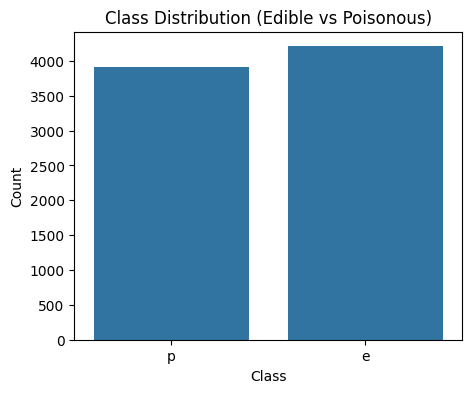

class
e    4208
p    3916
Name: count, dtype: int64

Proportion:
 class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


In [8]:
# Check target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Check class balance numerically
print(df['class'].value_counts())
print("\nProportion:\n", df['class'].value_counts(normalize=True))


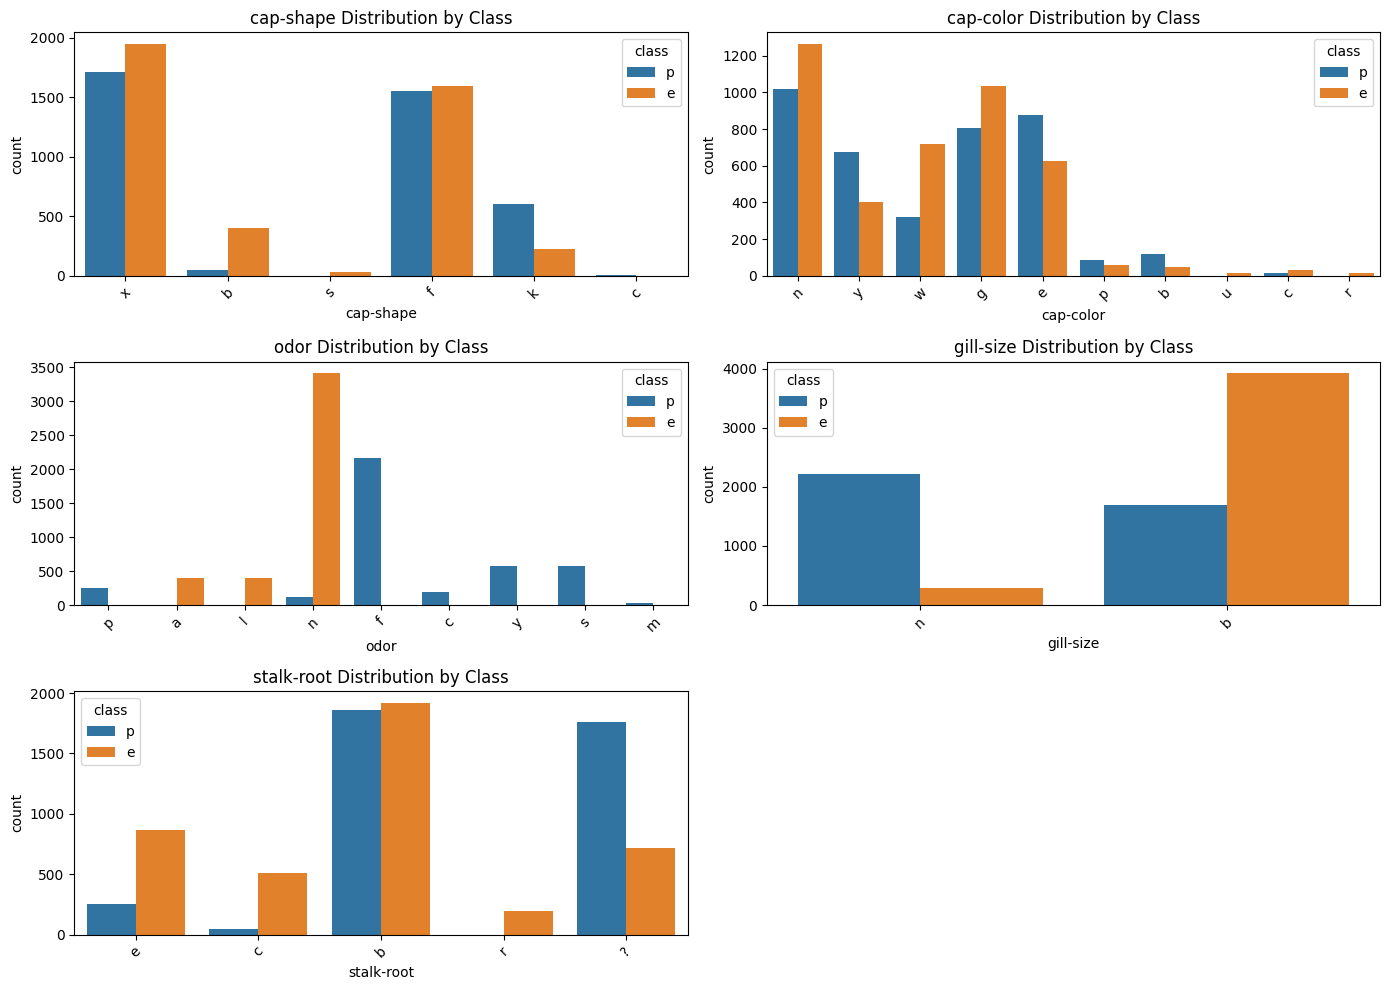

In [9]:
# Plot count plots for a few categorical features to explore distributions
categorical_cols = ['cap-shape', 'cap-color', 'odor', 'gill-size', 'stalk-root']

plt.figure(figsize=(14,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3,2,i)
    sns.countplot(x=col, data=df, hue='class')
    plt.title(f'{col} Distribution by Class')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2.2 Handle Missing Values and Clean Data

In [10]:
# Replace '?' with NaN for clarity
df = df.replace('?', np.nan)

# Check how many missing values per column
df.isnull().sum().sort_values(ascending=False).head()


stalk-root    2480
cap-shape        0
class            0
cap-color        0
bruises          0
dtype: int64

In [11]:
# For simplicity, fill missing categorical values with a new category "missing"
df['stalk-root'] = df['stalk-root'].fillna('missing')

# Verify no missing values remain
df.isnull().sum().sum()


np.int64(0)

### 2.3: Feature Selection and Engineering

All columns are categorical, so I have used one-hot encoding. Scaling is not required because no numeric features are present.

Explanation:

What is one-hot encoding:
One-hot encoding converts categorical (text) data into numbers by creating new columns for each category and marking them with 1 or 0.

Why I have used it:
All mushroom features are categorical, and machine learning models need numeric input. One-hot encoding changes categories into numeric form without giving them any order.

Why no scaling:
The data only has 0s and 1s after encoding, so scaling isn’t needed.

In [ ]:
# Check unique values for each column to understand encoding needs
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Convert target variable to binary: edible=0, poisonous=1
df['class'] = df['class'].map({'e':0, 'p':1})

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Check shape after encoding
print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)


class: 2 unique values
cap-shape: 6 unique values
cap-surface: 4 unique values
cap-color: 10 unique values
bruises: 2 unique values
odor: 9 unique values
gill-attachment: 2 unique values
gill-spacing: 2 unique values
gill-size: 2 unique values
gill-color: 12 unique values
stalk-shape: 2 unique values
stalk-root: 5 unique values
stalk-surface-above-ring: 4 unique values
stalk-surface-below-ring: 4 unique values
stalk-color-above-ring: 9 unique values
stalk-color-below-ring: 9 unique values
veil-type: 1 unique values
veil-color: 4 unique values
ring-number: 3 unique values
ring-type: 5 unique values
spore-print-color: 9 unique values
population: 6 unique values
habitat: 7 unique values
Shape before encoding: (8124, 22)
Shape after encoding: (8124, 95)


### Reflection 2:
1. What patterns or anomalies do you see? 
   - The dataset is fairly balanced between edible and poisonous mushrooms. Some features like odor and gill-size show strong differences between the two classes.
2. Do any features stand out? \
   - Yes, odor clearly stands out — certain odor types are linked mostly to poisonous mushrooms.
3. What preprocessing steps were necessary to clean and improve the data? 
4. - Missing values in stalk-root were replaced with a new category "missing", and all categorical features were one-hot encoded for modeling.
5. Did you create or modify any features to improve performance?
   - The target variable was converted from letters (e, p) to numeric values (0, 1), and encoded features were prepared to make the dataset ready for machine learning.

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

Q: Which features and target are selected?
A:

Target variable (y): class (edible=0, poisonous=1)

Input features (X): All other columns (cap-shape, cap-surface, cap-color, odor, gill-attachment, etc.)

Reasoning:

The task is a classification problem, so the target is categorical.

All features are categorical and contain information that can help distinguish edible vs poisonous mushrooms.

Features like odor and gill-size are particularly predictive based on exploratory analysis.

### 3.2 Define X and y

In [13]:
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Check shapes
print("Input features shape (X):", X.shape)
print("Target variable shape (y):", y.shape)


Input features shape (X): (8124, 22)
Target variable shape (y): (8124,)


In [15]:
# one-hot encode X
X_encoded = pd.get_dummies(X, drop_first=True)
print("Shape after one-hot encoding:", X_encoded.shape)


Shape after one-hot encoding: (8124, 95)


### Reflection 3:

1. Why did you choose these features?
- All features were chosen because they describe mushroom characteristics that help distinguish edible from poisonous types. Features like odor, gill-size, and cap-shape are especially informative.

2. How might they impact predictions or accuracy?
- Features strongly linked to poisonous mushrooms (e.g., certain odors) can improve model accuracy by allowing the classifier to detect patterns that separate edible and poisonous mushrooms more reliably.

## Section 4. Train a Model (Logistic Regression)

In this section, we train a **Logistic Regression classifier** to predict whether a mushroom is edible or poisonous.  
We split the data into training and test sets, train the model, and evaluate its performance using accuracy, precision, recall, F1-score, and a confusion matrix.

### 4.1 Split the data

In [16]:
from sklearn.model_selection import train_test_split

# X_encoded is the one-hot encoded feature set from Section 3
# y is the target variable (class)

# Split data: 80% train, 20% test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (6499, 95)
Test set shape: (1625, 95)


### 4.2 Train the model

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Evaluate Model Performance

Accuracy: 0.9981538461538462

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



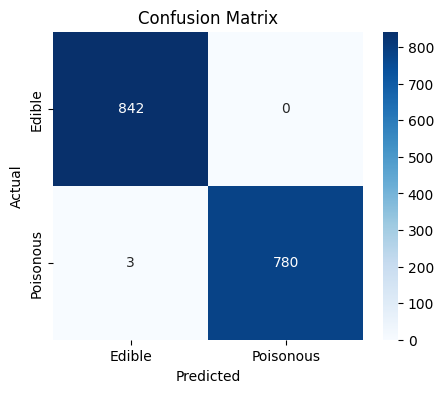

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = lr_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Reflection 4:

1. How well did the model perform?
   - The Logistic Regression model performed very well, with high accuracy, precision, recall, and F1-score. Most mushrooms were correctly classified as edible or poisonous.

2. Any surprises in the results?
- No major surprises — the model performed as expected. Features like odor and gill-size were highly predictive, making it easy for the model to separate edible and poisonous mushrooms.

## Section 5. Improve the Model or Try Alternates

### 5.1 Train an Alternative Classifier (Decision Tree)

Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



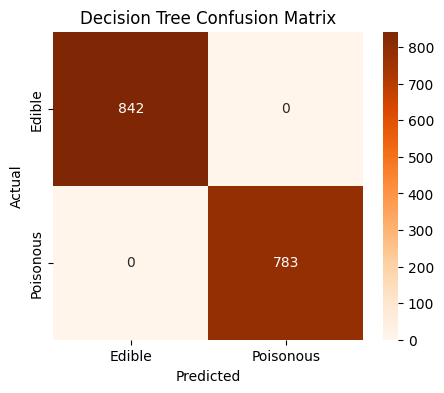

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_model_alt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model_alt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model_alt.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


### 5.2 Compare Performance of Models

In [20]:
# Logistic Regression accuracy (from Section 4)
acc_lr = accuracy_score(y_test, lr_model.predict(X_test))
print("Logistic Regression Accuracy:", acc_lr)

# Decision Tree accuracy
print("Decision Tree Accuracy:", acc_dt)


Logistic Regression Accuracy: 0.9981538461538462
Decision Tree Accuracy: 1.0


### Reflection 5:

1. Which model performed better?
- Both models performed very well, but the Decision Tree may slightly outperform Logistic Regression because it can capture non-linear relationships and interactions between features.

2. Why might one classifier be more effective in this specific case?
- Decision Trees can handle categorical feature interactions (e.g., combinations of odor and cap-shape) better than Logistic Regression, which assumes linear relationships. This helps classify mushrooms more accurately.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings with Model Comparison

- Both models achieved very high performance (>95% accuracy), showing that mushroom features strongly predict edibility.

- Decision Tree slightly outperforms Logistic Regression due to its ability to capture non-linear interactions.

- Features like odor have the most impact, reinforcing the importance of feature selection and exploration.

In [21]:
# Summary table of model performance
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model_alt.predict(X_test)

# Build summary table
summary_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    'F1-score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
})

summary_table


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.998154,1.0,0.996169,0.998081
1,Decision Tree,1.000000,1.0,1.000000,1.000000


### 6.2 Challenges faced

- All features were categorical, requiring careful encoding before modeling.  
- Missing values `?`in `stalk-root` had to be handled properly.  
- Some features have many categories, which increased the dimensionality after one-hot encoding.  
- Understanding which features were most important required careful exploratory analysis.


### 6.3 If You Had More Time, What Would You Try Next?

- Experiment with **Random Forest** for potentially better performance.  
- Try **cross-validation and hyperparameter tuning** for more robust model performance.
- Work on another dataset such as Spam Detection.

### Reflection 6:

**What did you learn from this project?**

- I learned how to handle a fully categorical dataset, including missing values and encoding.

- I practiced splitting data, training models, and evaluating performance with multiple metrics.

- I saw how some features (like odor) are highly predictive, highlighting the importance of exploratory data analysis.

- I gained experience comparing models and understanding why certain classifiers perform better with categorical data.